In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/mjohantito/DataRumah_DM3Nov/main/Property_Dataset_-_Clustering_-_Data_Rumah.csv")
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    object 
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(4), object(8)
memory usage: 29.0+ KB


In [41]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [42]:
df = df.dropna(subset=['Area Category'])
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [43]:
df = df.dropna(subset=['Jumlah Kamar Mandi'])
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 0
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  81
Posisi Rumah                     114
Lebar Jalan Depan Rumah (ROW)     40
dtype: int64

In [44]:
df = df.dropna(subset=['Tingkat/Lantai '])
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 0
Tingkat/Lantai                     0
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  80
Posisi Rumah                     113
Lebar Jalan Depan Rumah (ROW)     39
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530,5.0,6.0,2.0,10800000000,Belum,Utara,Standard,1-2 Mobil


In [46]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = le.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Nama Daerah'] = le.fit_transform(df['Nama Daerah'])
df['Luas Tanah (m2)'] = le.fit_transform(df['Luas Tanah (m2)'])
df['Luas Bangunan (m2)'] = le.fit_transform(df['Luas Bangunan (m2)'])
df['Jumlah Kamar'] = le.fit_transform(df['Jumlah Kamar'])
df['Jumlah Kamar Mandi'] = le.fit_transform(df['Jumlah Kamar Mandi'])
df['Tingkat/Lantai '] = le.fit_transform(df['Tingkat/Lantai '])
df['Harga Penawaran (dari Owner)'] = le.fit_transform(df['Harga Penawaran (dari Owner)'])
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df=df
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,99,5,96,1,0,2,79,0,3,2,1
2,3,48,69,29,4,3,2,74,0,1,0,0
3,2,48,73,49,4,4,2,84,0,3,2,0
4,1,48,103,97,4,4,2,124,0,0,2,0
5,1,48,115,91,4,5,2,5,0,3,2,0


In [48]:
df.dtypes

Area Category                    int64
Nama Daerah                      int64
Luas Tanah (m2)                  int64
Luas Bangunan (m2)               int64
Jumlah Kamar                     int64
Jumlah Kamar Mandi               int64
Tingkat/Lantai                   int64
Harga Penawaran (dari Owner)     int64
Terjual/Belum                    int64
Arah Hadap Rumah                 int64
Posisi Rumah                     int64
Lebar Jalan Depan Rumah (ROW)    int64
dtype: object

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
standardized_data = sc.fit_transform(df)
standardized_data

array([[-1.68180019,  1.04584718, -1.68567045, ...,  0.84655525,
        -0.18902409,  0.21238856],
       [ 1.00849207, -0.35621719,  0.0852815 , ..., -1.13198384,
        -5.43014645, -0.83242612],
       [ 0.11172798, -0.35621719,  0.19596599, ...,  0.84655525,
        -0.18902409, -0.83242612],
       ...,
       [-0.7850361 ,  0.30357781, -0.7171811 , ..., -1.13198384,
        -0.18902409, -0.83242612],
       [ 1.00849207,  1.18330447, -0.77252335, ...,  0.84655525,
        -0.18902409,  1.25720324],
       [-1.68180019,  1.51320196,  0.27897937, ...,  0.84655525,
        -0.18902409,  1.25720324]])

In [50]:
standardized_df = pd.DataFrame(standardized_data, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
standardized_df.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.681800,1.045847,-1.685670,1.124702,-1.416808,-1.487025,0.288036,-0.060484,0.0,0.846555,-0.189024,0.212389
1,1.008492,-0.356217,0.085281,-0.781992,0.453869,0.426657,0.288036,-0.167489,0.0,-1.131984,-5.430146,-0.832426
2,0.111728,-0.356217,0.195966,-0.212829,0.453869,1.064551,0.288036,0.046521,0.0,0.846555,-0.189024,-0.832426
3,-0.785036,-0.356217,1.026100,1.153160,0.453869,1.064551,0.288036,0.902557,0.0,-2.121253,-0.189024,-0.832426
4,-0.785036,-0.356217,1.358153,0.982412,0.453869,1.702445,0.288036,-1.644152,0.0,0.846555,-0.189024,-0.832426


In [51]:
from sklearn import preprocessing
import pandas as pd
d = preprocessing.normalize(df, axis=0)
scaled_df = pd.DataFrame(d, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai ','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
scaled_df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.000000,0.079858,0.003808,0.082639,0.015713,0.000000,0.057663,0.048006,0.0,0.072463,0.054353,0.04598
1,0.078730,0.038719,0.052557,0.024964,0.062854,0.061148,0.057663,0.044968,0.0,0.024154,0.000000,0.00000
2,0.052486,0.038719,0.055604,0.042180,0.062854,0.081531,0.057663,0.051044,0.0,0.072463,0.054353,0.00000
3,0.026243,0.038719,0.078454,0.083500,0.062854,0.081531,0.057663,0.075351,0.0,0.000000,0.054353,0.00000
4,0.026243,0.038719,0.087595,0.078335,0.062854,0.101914,0.057663,0.003038,0.0,0.072463,0.054353,0.00000


In [52]:
from sklearn.cluster import KMeans
X = standardized_data
wcss = [] #within cluster sum of square


# check the inertia for each K
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 100, n_init = 5, random_state=42)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)

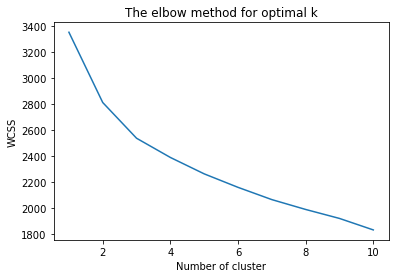

In [53]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method for optimal k')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [54]:
from kneed import KneeLocator
kn = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
print('the optimal k is ',kn.knee)

the optimal k is  3


In [55]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 5, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [56]:
y_kmeans

array([1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 1,

In [57]:
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,99,5,96,1,0,2,79,0,3,2,1
2,3,48,69,29,4,3,2,74,0,1,0,0
3,2,48,73,49,4,4,2,84,0,3,2,0
4,1,48,103,97,4,4,2,124,0,0,2,0
5,1,48,115,91,4,5,2,5,0,3,2,0


In [58]:
df['KMeans_Clusters'] = y_kmeans

df.groupby("KMeans_Clusters").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum','mean'),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah','mean'),
                                 Posisi_Rumah = ('Posisi Rumah','mean'),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)','mean'),
                                 Count = ("KMeans_Clusters",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
KMeans_Clusters,,,,,,,,,,,,
0,3,72,54.362963,27.037037,3.000000,1.681481,65.770370,0.0,2.074074,2.059259,0.703704,135
1,3,11,20.254545,94.600000,1.290909,1.090909,90.254545,0.0,2.327273,2.036364,0.600000,55
2,1,11,101.321739,72.808696,4.539130,2.034783,96.643478,0.0,2.139130,2.104348,1.000000,115


# Hierarical Cluster

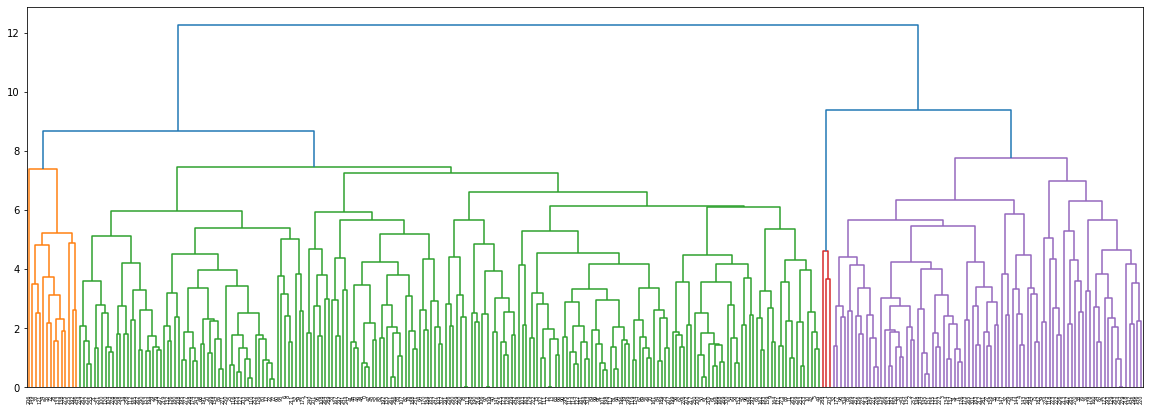

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='complete')
dendrogram(linkage_data)
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(X)
labels

array([1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 3, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,

In [61]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum','mean'),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah','mean'),
                                 Posisi_Rumah = ('Posisi Rumah','mean'),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)','mean'),
                                 Count = ("KMeans_Clusters",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,
0,1,11,103.423529,75.600000,4.647059,1.964706,96.494118,0.0,1.941176,2.023529,0.741176,85
1,3,11,47.852217,47.453202,2.596059,1.581281,73.630542,0.0,2.182266,2.049261,0.788177,203
2,"[1, 2, 3]","[11, 48, 62]",89.000000,67.333333,5.000000,2.666667,71.333333,0.0,2.333333,0.000000,0.666667,3
3,1,30,95.214286,68.928571,4.357143,1.785714,113.857143,0.0,2.785714,3.142857,1.285714,14


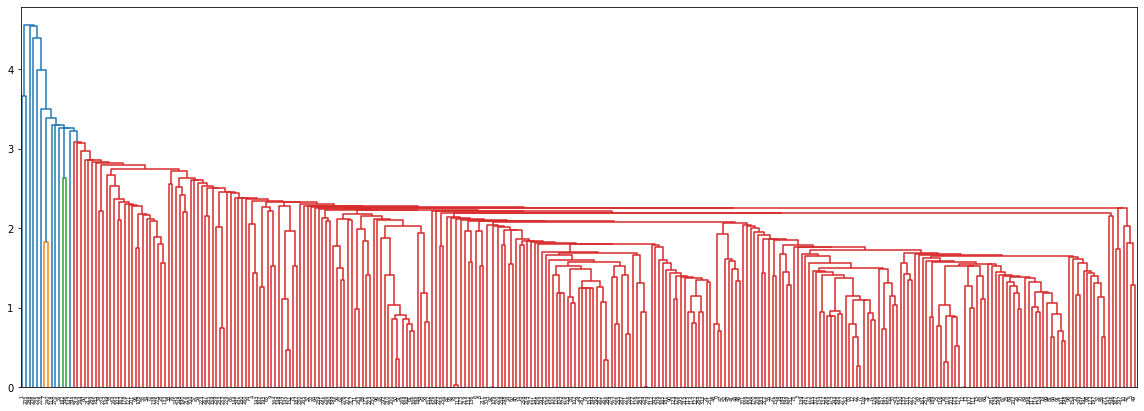

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='single')
dendrogram(linkage_data)
plt.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(X)
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum','mean'),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah','mean'),
                                 Posisi_Rumah = ('Posisi Rumah','mean'),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)','mean'),
                                 Count = ("KMeans_Clusters",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,
0,3,11,65.883721,56.272425,3.262458,1.697674,81.684385,0.0,2.139535,2.086379,0.800664,301
1,"[1, 3]","[48, 62]",76.000000,49.000000,4.000000,3.000000,95.500000,0.0,2.000000,0.000000,0.000000,2
2,2,11,115.000000,104.000000,7.000000,2.000000,23.000000,0.0,3.000000,0.000000,2.000000,1
3,3,30,7.000000,86.000000,1.000000,2.000000,156.000000,0.0,3.000000,4.000000,0.000000,1


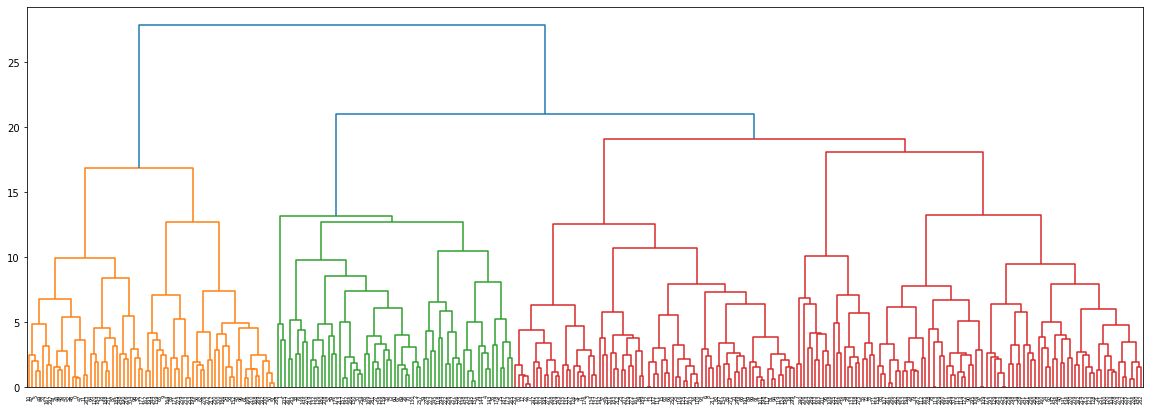

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='ward')
dendrogram(linkage_data)
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(X)
labels

array([1, 2, 2, 3, 2, 1, 3, 0, 3, 1, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 0,
       3, 3, 0, 3, 2, 2, 0, 0, 2, 3, 1, 0, 0, 2, 2, 3, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1,
       3, 2, 3, 2, 2, 3, 0, 2, 2, 2, 2, 3, 0, 0, 3, 3, 3, 0, 3, 2, 3, 1,
       1, 3, 0, 3, 0, 3, 3, 0, 1, 0, 1, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 3, 3, 2, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 2, 3,
       2, 0, 3, 3, 2, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 3, 2, 2, 2, 2, 1, 0,
       3, 0, 2, 2, 2, 1, 0, 3, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 3, 2,
       3, 1, 2, 3, 2, 0, 2, 3, 1, 1, 1, 2, 1, 3, 1, 3, 0, 1, 0, 3, 3, 3,
       3, 1, 1, 0, 1, 3, 2, 2, 0, 3, 2, 0, 1, 3, 3, 2, 0, 0, 1, 1, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 3, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 3, 0, 0,
       0, 3, 1, 2, 0, 3, 1, 3, 3, 0, 3, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 2, 2, 3, 1, 2, 3, 3, 1, 0, 0, 1, 3, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 3, 1,

In [67]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum','mean'),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah','mean'),
                                 Posisi_Rumah = ('Posisi Rumah','mean'),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)','mean'),
                                 Count = ("KMeans_Clusters",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,
0,1,11,71.200000,45.442105,3.547368,1.800000,78.389474,0.0,2.094737,2.263158,1.757895,95
1,3,11,33.426471,84.058824,1.573529,0.985294,82.750000,0.0,2.352941,2.000000,0.632353,68
2,1,11,97.907692,70.230769,4.861538,2.307692,97.676923,0.0,2.276923,1.969231,0.492308,65
3,3,"[30, 72]",61.090909,34.129870,3.090909,1.727273,71.870130,0.0,1.909091,1.987013,0.012987,77


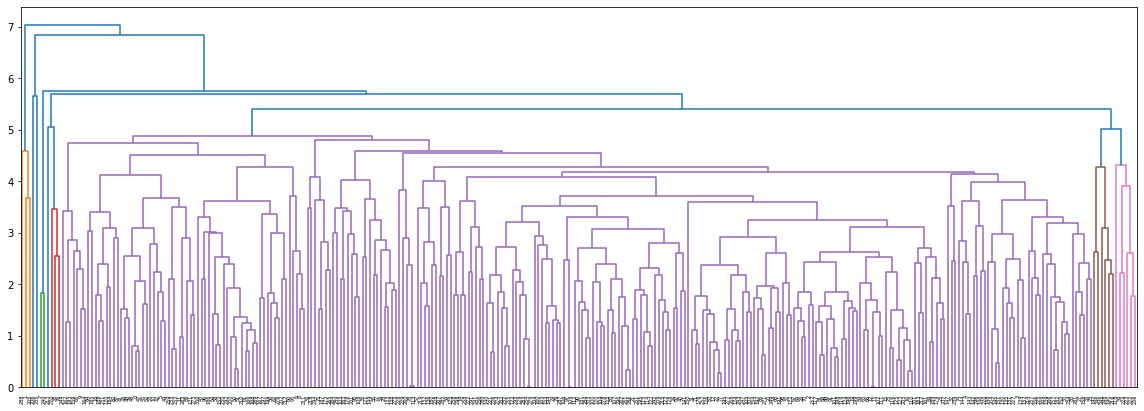

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='average')
dendrogram(linkage_data)
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(X)
labels

array([0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
df['hierarchical_cluster'] = labels

df.groupby("hierarchical_cluster").agg(Area_Category = ('Area Category',pd.Series.mode),
                                 Nama_Daerah = ('Nama Daerah',pd.Series.mode),
                                 Luas_Tanah = ('Luas Tanah (m2)', 'mean'),
                                 Luas_Bangunan = ('Luas Bangunan (m2)','mean'),
                                 Jumlah_Kamar = ('Jumlah Kamar','mean'),
                                 Tingkat_Lantai = ('Tingkat/Lantai ','mean'),
                                 Harga_Penawaran = ('Harga Penawaran (dari Owner)','mean'),
                                 Terjual_Belum = ('Terjual/Belum','mean'),
                                 Arah_Hadap_Rumah = ('Arah Hadap Rumah','mean'),
                                 Posisi_Rumah = ('Posisi Rumah','mean'),
                                 Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)','mean'),
                                 Count = ("KMeans_Clusters",'count'))

,Area_Category,Nama_Daerah,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
hierarchical_cluster,,,,,,,,,,,,
0,3,11,65.892617,56.422819,3.258389,1.708054,81.352349,0.0,2.147651,2.073826,0.798658,298
1,"[1, 2, 3]","[11, 48, 62]",89.000000,67.333333,5.000000,2.666667,71.333333,0.0,2.333333,0.000000,0.666667,3
2,"[2, 3]","[11, 30]",61.000000,91.500000,3.000000,2.000000,91.500000,0.0,3.000000,4.000000,1.000000,2
3,0,"[97, 105]",40.000000,13.500000,3.000000,0.000000,158.500000,0.0,0.500000,3.000000,0.500000,2
